# House Prices - Advanced Regression Techniques

***

## Predict sales prices and practice feature engineering, RFs, and gradient boosting

****

<img width="633" height="112" style="display: block; margin-left: auto; margin-right: auto" src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## How this book is organized

# DATA

## Lib's 

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from  itertools import combinations
from scipy                  import stats

from sklearn.preprocessing  import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn import preprocessing

from category_encoders.target_encoder import TargetEncoder

#pd.set_option('display.max_rows', None)

## DATASET

In [2]:
train_raw = pd.read_csv('/Users/daianeklein/Documents/Personal-Projects/House Prices - Advanced Regression Techniques/TT02/.house-prices-advanced-regression-techniques/train.csv')
test_raw = pd.read_csv('/Users/daianeklein/Documents/Personal-Projects/House Prices - Advanced Regression Techniques/TT02/.house-prices-advanced-regression-techniques/test.csv')

df = train_raw.copy()

### Data Type

In [3]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1088,1089,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137500
1083,1084,20,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,3,2006,WD,Normal,160000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950
357,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400


In [4]:
# columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# data types
for f in df:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(df[f].dtypes))

Id                  int64
MSSubClass          int64
MSZoning            object
LotFrontage         float64
LotArea             int64
Street              object
Alley               object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea          float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtFinSF1          int64
BsmtFinType2        object
BsmtFinSF2          int64
BsmtUnfS

### Data Dimensions

In [7]:
print('Rows: {}\nColumns: {}'.format(df.shape[0], df.shape[1]))

Rows: 1460
Columns: 81


### Null Values

In [8]:
df.isna().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [9]:
# missing values
missing = df.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

# count + percentage
aux['percentage'] = aux['variables'].apply(lambda x : (x / (df.shape[0]) * 100))

aux

,variables,percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [10]:
# dropping missing values > 40%
df = df.drop(columns = aux[aux['percentage'] > 40].index)

# ffill missing values < 1%
df.loc[:, aux[aux['percentage'] < 1].index] = df.loc[:, aux[aux['percentage'] < 1].index].fillna(method = 'ffill')

aux2 = df.loc[:, aux[(aux['percentage'] > 1) & (aux['percentage'] < 18)].index]
aux2

for c in aux2.columns:
    df[c].fillna(df[c].mode()[0], inplace=True)

**MISSING VALUES**

First of all, we had checked the percentage of null values for each variable.

Variables with more than 40% null values were dropped from our dataset.
- PoolQC  99.52%
- MiscFeature |	96.30%
- Alley 	  |	93.76%
- Fence	      |	80.75%
- FireplaceQu |	47.26%

First step, we filled null values using Pandas method: ffill for all variables between 1 and 18% null values.

Last step, all missing values left were replaced by it's mode.

# FUNCTIONS

In [11]:
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    chi2 = stats.chi2_contingency( cm )[0]
    n = cm.sum()
    r, k = cm.shape
    chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2/n)/ (min(kcorr-1,rcorr-1)))

# DIMENSIONS ANALYSIS

In [12]:
# numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

### Numerical Attributes

In [13]:
cols = num_attributes.columns

def funcao_value_counts():
    for d in num_attributes[cols]:
        print((num_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False).head(6))

funcao_value_counts()

1     0.068493
22    0.068493
4     0.068493
5     0.068493
6     0.068493
7     0.068493
Name: Id, dtype: float64
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
Name: MSSubClass, dtype: float64
60.0    27.534247
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
65.0     3.013699
Name: LotFrontage, dtype: float64
7200     1.712329
9600     1.643836
6000     1.164384
8400     0.958904
9000     0.958904
10800    0.958904
Name: LotArea, dtype: float64
5    27.191781
6    25.616438
7    21.849315
8    11.506849
4     7.945205
9     2.945205
Name: OverallQual, dtype: float64
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
Name: OverallCond, dtype: float64
2006    4.589041
2005    4.383562
2004    3.698630
2007    3.356164
2003    3.082192
1976    2.260274
Name: YearBuilt, dtype: float64
1950    12.191781
2006     6.643836
2007     5.205479
2005     5.000000
2004     4.24657

In [14]:
# drop numerical columns
df = df.drop(['MSSubClass', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 
'BsmtFinSF2'], axis = 1)

### Categorical Attributes

In [15]:
cols = cat_attributes.columns

def funcao_value_counts():
    for d in cat_attributes[cols]:
        print((cat_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      

In [16]:
# drop categorical columns
df = df.drop(['SaleCondition','SaleType', 'PavedDrive', 'GarageCond', 'GarageQual', 'Functional', 'Electrical', 'CentralAir',
'Heating', 'BsmtFinType2', 'BsmtCond', 'RoofMatl', 'BldgType', 'Condition2', 'Condition1', 'LandSlope',
'Utilities', 'Street'], axis = 1)

**Data Dimension**

"Raw" dataset has more than 80 features, so, to make analysis easier and less redundant, we had checked how much concentrate is each variable.

For example: Utilities variable has only two possible attributes: AllPub and NoSeWa, which 99.93% of all values is concentrate in AllPub. So, we can assume that this variable has less impact in our responde variable SalePrice.

All numerical and categorical attributes were dropped from our dataset.


# DESCRIPTIVE ANALYSIS

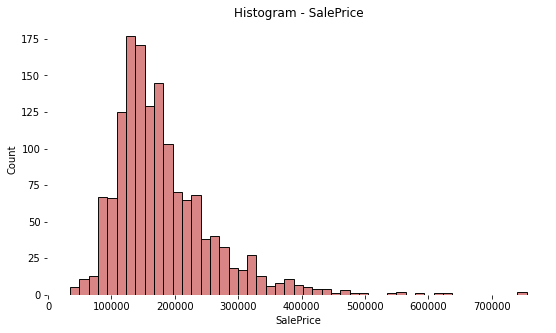

In [17]:
# Sales Variable
plt.figure(figsize = (9, 5))
sns.histplot(data = df['SalePrice'], color = 'indianred')
sns.despine(bottom = True, left = True)
plt.title('Histogram - SalePrice');

Although it's not a perfect shape, our variable, dependent variable, "SalePrice" is similar to a normal distribution. 

In [18]:
# numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [19]:
# Central Tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
#ct3 = pd.DataFrame(num_attributes.apply(mode)).T

# Dipersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attributes,mean,median,std,min,max,range
0,Id,730.500000,730.5,421.465598,1.0,1460.0,1459.0
1,LotFrontage,68.267123,63.0,22.348697,21.0,313.0,292.0
2,LotArea,10516.828082,9478.5,9977.846105,1300.0,215245.0,213945.0
3,OverallQual,6.099315,6.0,1.382523,1.0,10.0,9.0
4,OverallCond,5.575342,5.0,1.112418,1.0,9.0,8.0
5,YearBuilt,1971.267808,1973.0,30.192559,1872.0,2010.0,138.0
6,YearRemodAdd,1984.865753,1994.0,20.638335,1950.0,2010.0,60.0
7,MasVnrArea,103.492466,0.0,180.733685,0.0,1600.0,1600.0
8,BsmtFinSF1,443.639726,383.5,455.941866,0.0,5644.0,5644.0
9,BsmtUnfSF,567.240411,477.5,441.715605,0.0,2336.0,2336.0


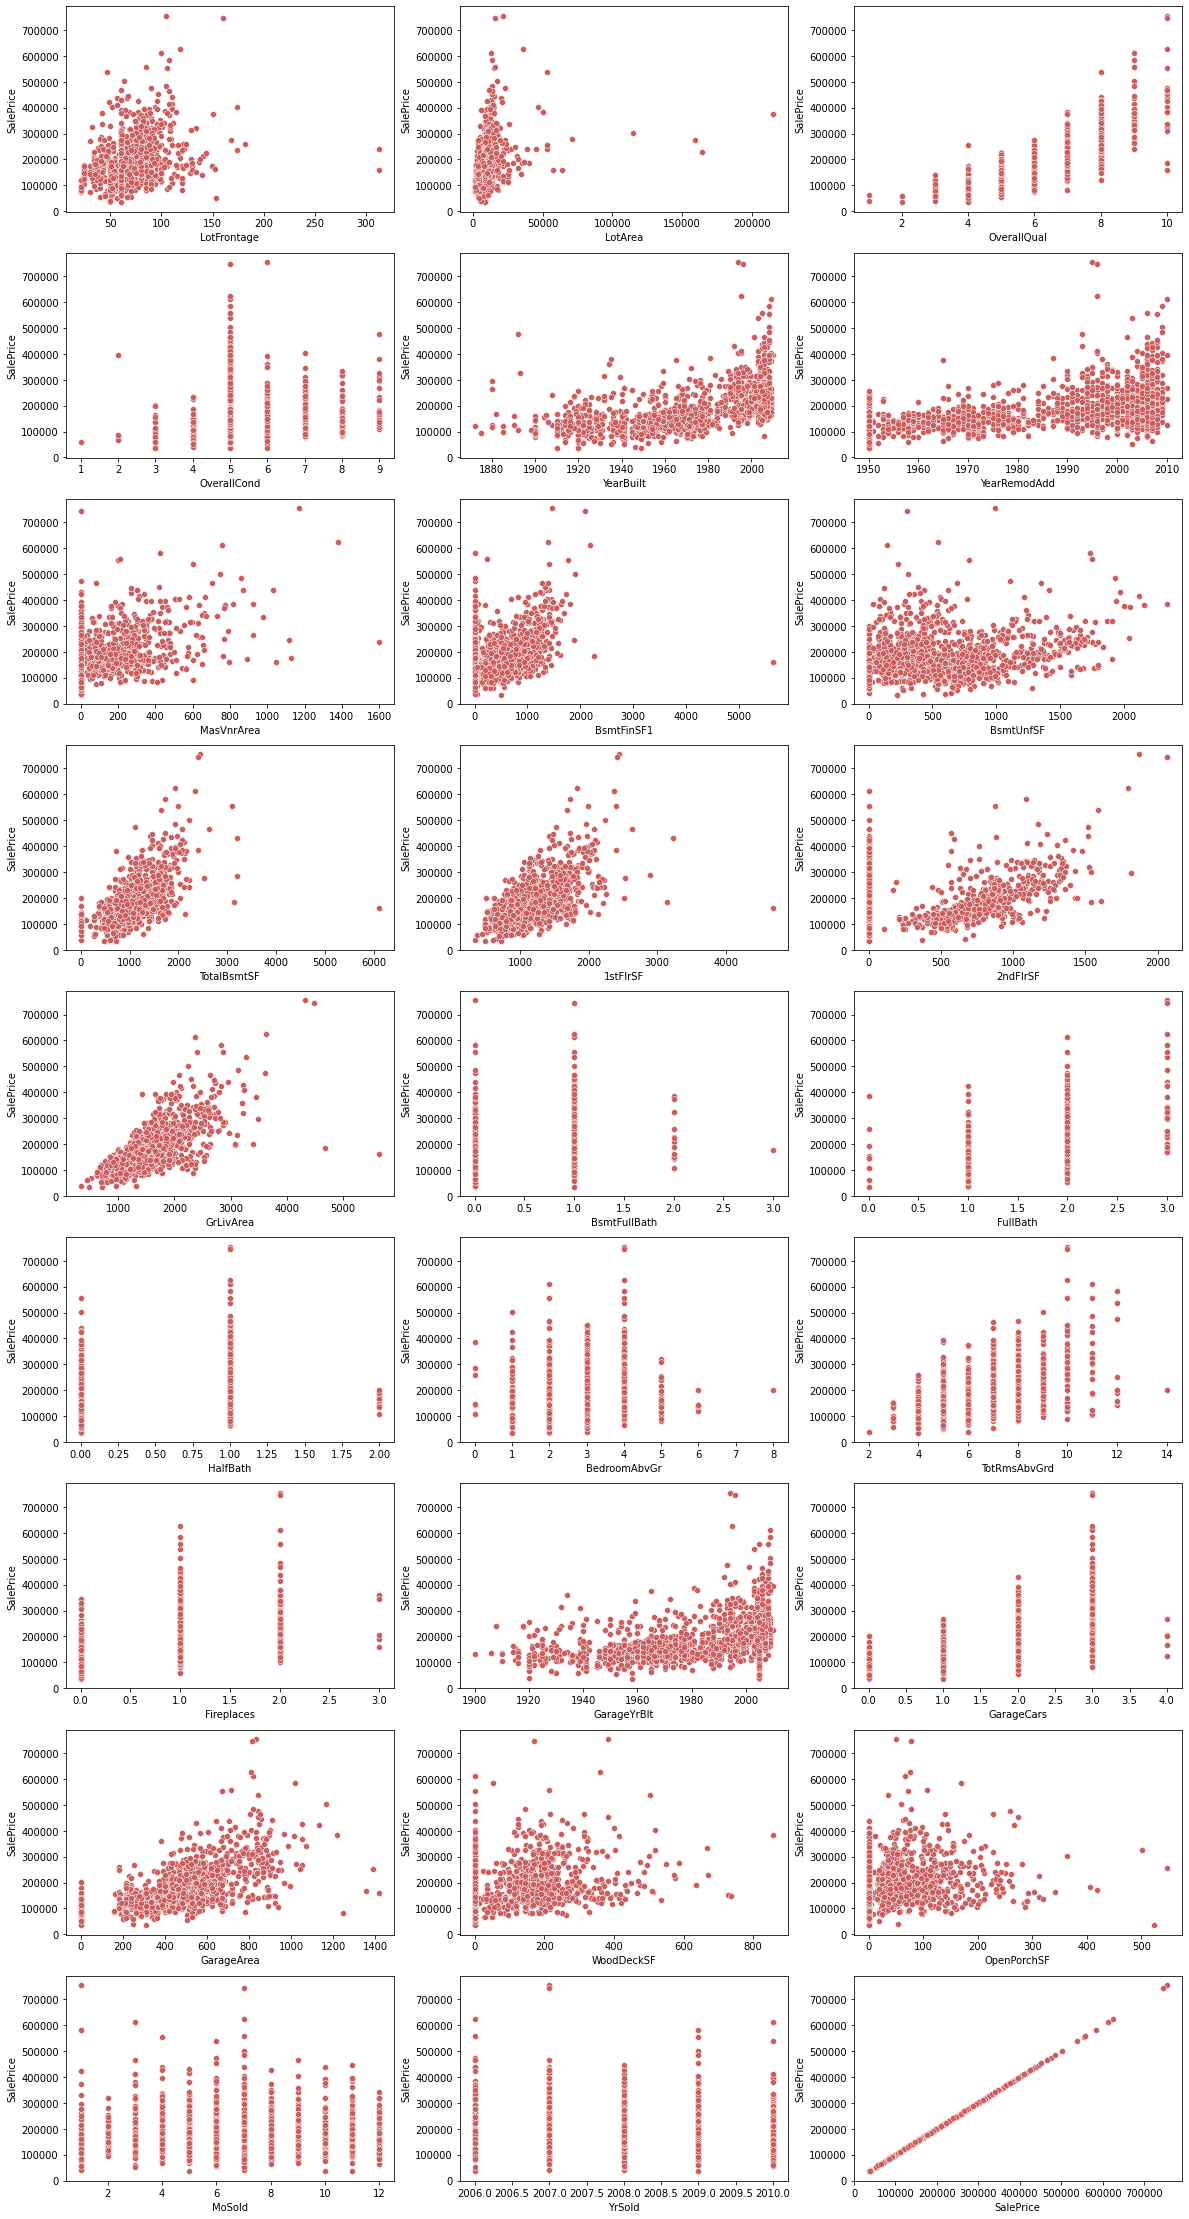

In [20]:
aux = num_attributes.drop(['Id'], axis = 1)

plt.figure(figsize = (20,40 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    sns.scatterplot(data = aux, x = d, y = 'SalePrice', color = 'indianred')
    x += 1
 

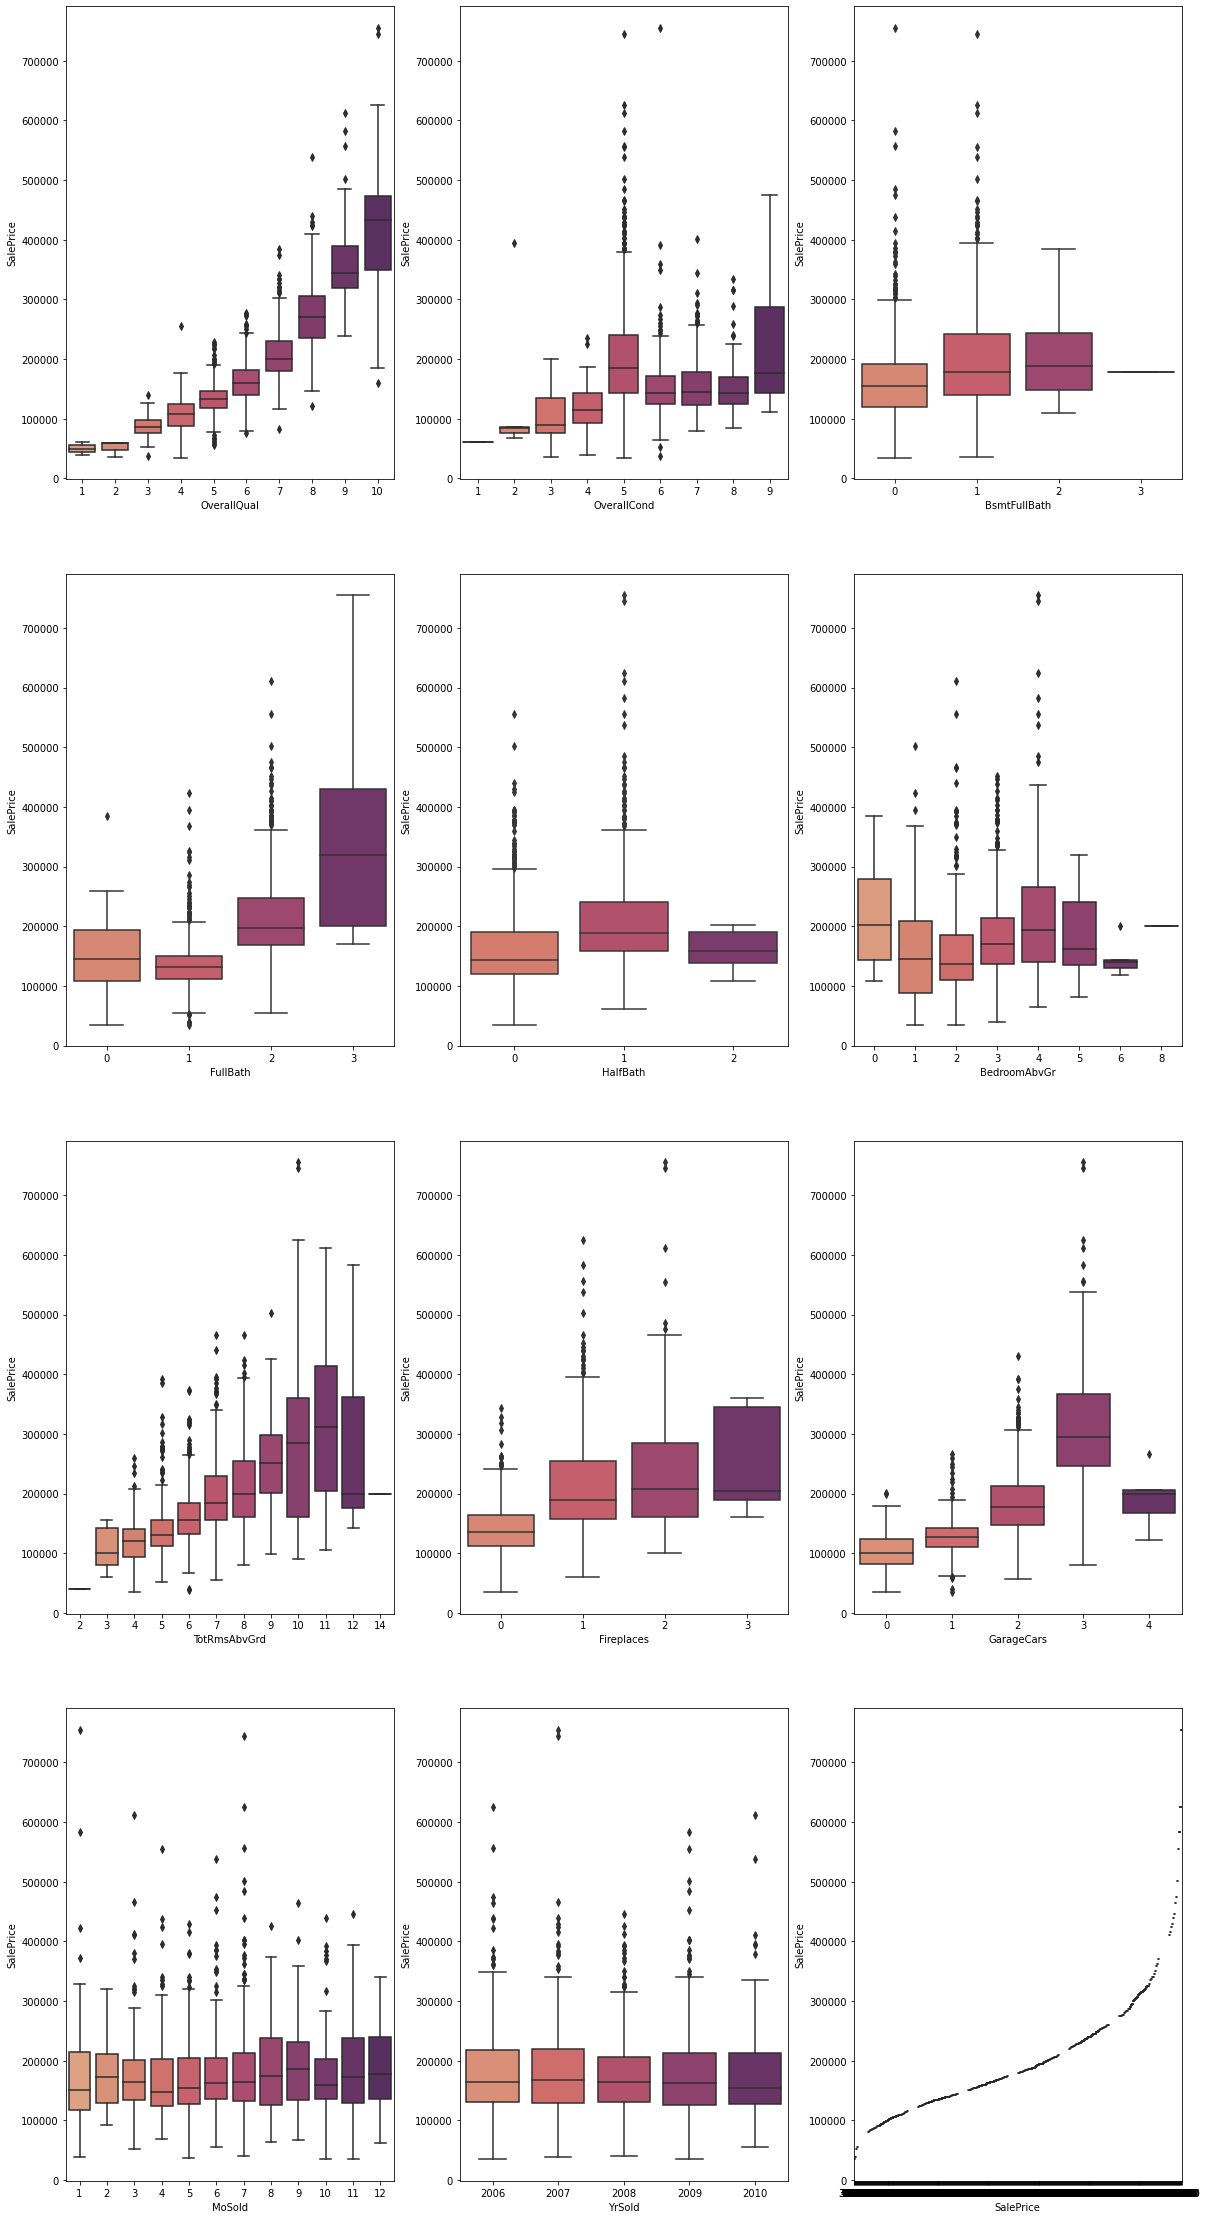

In [21]:
aux = num_attributes[['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                      'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'SalePrice']]

plt.figure(figsize = (20,40 ))
x = 1
for d in aux:
    plt.subplot(4, 3, x)
    sns.boxplot(data = aux, x = d, y = 'SalePrice', palette = 'flare')
    x += 1

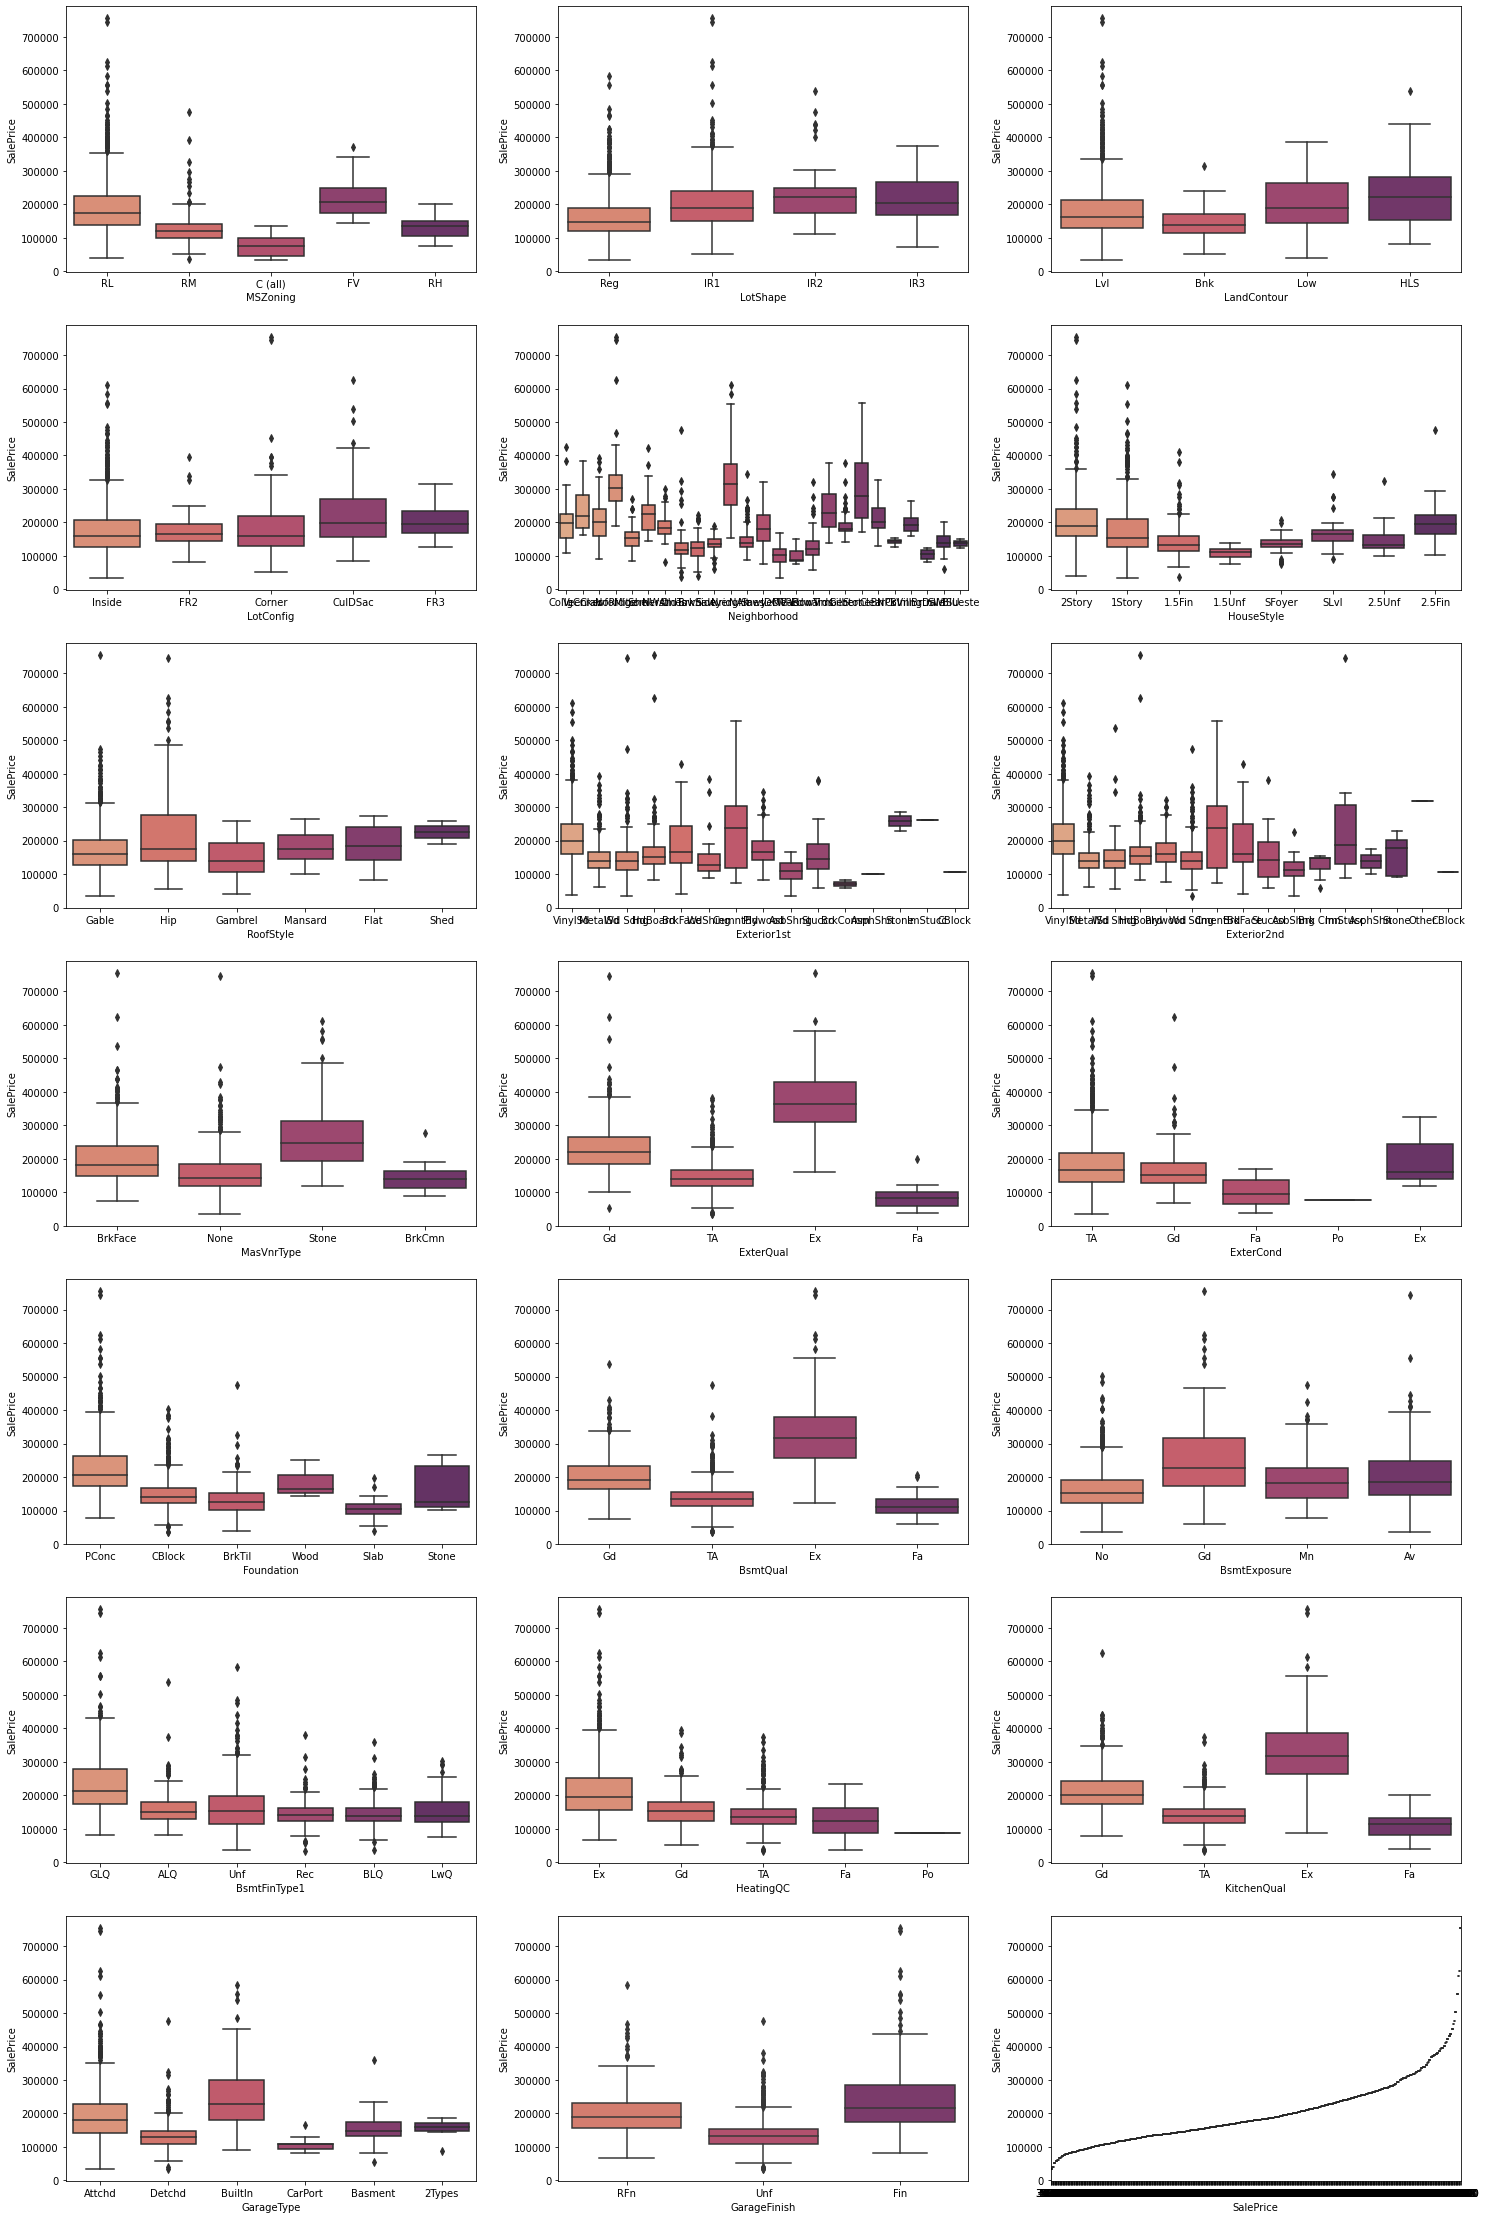

In [22]:
cat_attributes = cat_attributes.merge(num_attributes['SalePrice'], how = 'left', left_index = True, right_index = True)
aux = cat_attributes

plt.figure(figsize = (25,40 ))
x = 1
for d in aux:
    plt.subplot(7, 3, x)
    sns.boxplot(data = aux, x = d, y = 'SalePrice', palette = 'flare')
    x += 1
 

**Numerical Variable Analysis**

Some numerical variable, although is int type, have a categorical behavior, as MoSold, YrSold or GarageCars, so, a scatterplot it's not usefull for meaninfull analysis. We're going to plot a boxplot chart for then.

For other variables, we can notice some linear behavior for some dependent and independent variables, and some not.

LotArea, YearRemodYear, YearBuilt, some variables regarded to basement característics are not so clear to explain sale price.

***

For our numerical variables plotted in boxplot charts, datetime caracteristics are not so relevant. There're some differences, but not so meaninfull, specially when comparing to other variables of our dataset. 


***

**Categorical Variable Analysis**

Most of our categorical variables looks like relevant for our analysis. 
LostConfig and LotShape, for instance, have some differences, but very subles differences. Possibly, it won't make huge difference. Once again, variables regarded to basement característics don't have many statistical differences.

# FEATURE ENGINEERING

In [23]:
df1 = df.copy()

In [24]:
df1['REMODEL'] = df[['YearBuilt', 'YearRemodAdd']].apply(lambda x: 0 if
                                               x['YearBuilt'] - x['YearRemodAdd'] == 0
                                               else 1, axis = 1)

df1[['YearBuilt', 'YearRemodAdd', 'REMODEL']].sample(5)

,YearBuilt,YearRemodAdd,REMODEL
920,1994,1994,0
271,1954,2005,1
704,2004,2005,1
992,1964,1993,1
617,1954,1954,0


## Hypothesis

<img src="https://i.ibb.co/ryhHLPD/Data-Science.jpg" alt="Data-Science" width="1381" height="723" data-load="full" style="">

**REMODELED HOUSES**

1. Remodeled houses cost more

2. Remodeled houses have a better quality condition and then, cost more

**GARAGE**

3. Houses with more car capacity cost more

4. Houses with no car space cost less

5. Houses with more than one type of garage cost more

**BASEMENT**

6. Houses with unfinished basement cost less

7. Houses with bad basement quality have worst quality rating and cost less

**KITCHEN**

8. Houses with good quality rating cost more

**BATH**

9. Houses with full bath + half bath cost more

**LOT CONFIGURATION AND AREA**

10. Houses with more than one frontage (entry) cost more

11. Irregular lots shape cost less

***

**REMODELED HOUSES**

1. Remodeled houses cost more

   REMODEL      SalePrice
0        0  182583.659686
1        1  179096.307471


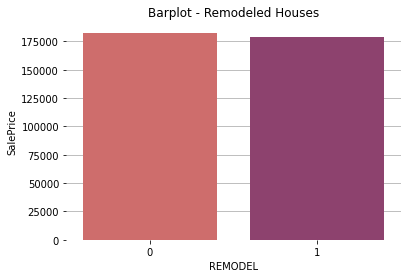

In [25]:
ax = sns.barplot(data = df1[['SalePrice', 'REMODEL']].groupby('REMODEL', as_index = False).mean(),
           x = 'REMODEL', y = 'SalePrice', palette = 'flare')

plt.title('Barplot - Remodeled Houses' )
sns.despine(bottom = True, left = True);

ax.grid(axis='y')
ax.set_axisbelow(True)

print(df1[['SalePrice', 'REMODEL']].groupby('REMODEL', as_index = False).mean())

***

**REMODELED HOUSES**

2. Remodeled houses have a better quality condition and then, cost more

Dict:

    OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

***

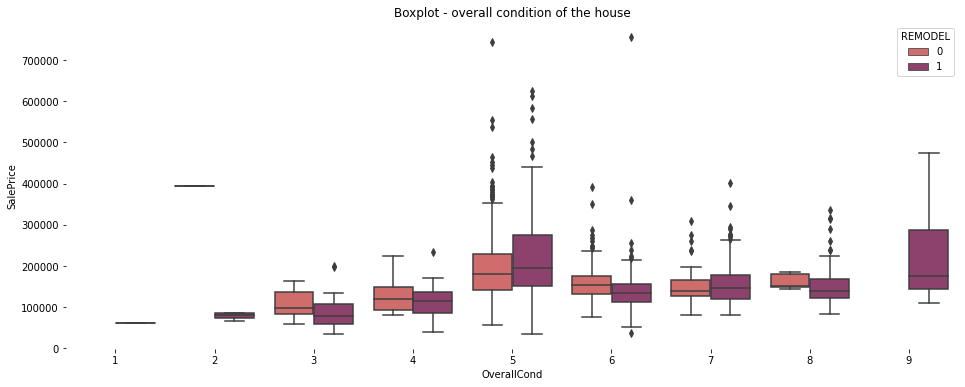

In [26]:
#[['REMODEL', 'OverallCond', 'SalePrice']]
plt.figure(figsize=(16, 6))

sns.boxplot(data = df1[['REMODEL', 'OverallCond', 'SalePrice']],
           x = 'OverallCond', y = 'SalePrice', hue = 'REMODEL', palette = 'flare')

plt.title('Boxplot - overall condition of the house' )
sns.despine(bottom = True, left = True);

***

**GARAGE**

3. Houses with more car capacity cost more

4. Houses with no car space cost less

***

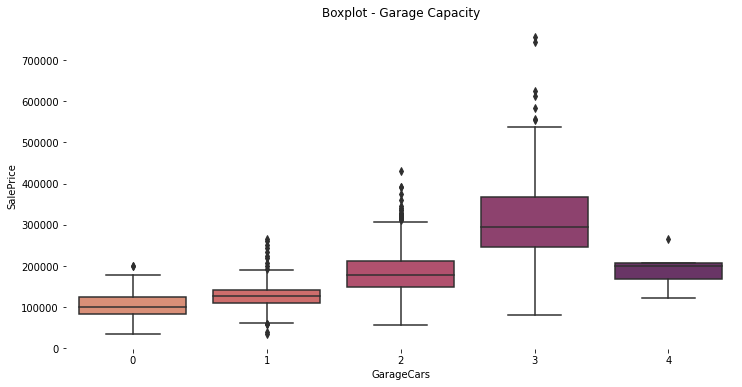

In [27]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = df1[['GarageCars', 'SalePrice']],
           x = 'GarageCars', y = 'SalePrice', palette = 'flare')

plt.title('Boxplot - Garage Capacity' )
sns.despine(bottom = True, left = True);

***

5. Houses with more than one type of garage cost more

Dict:

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
***

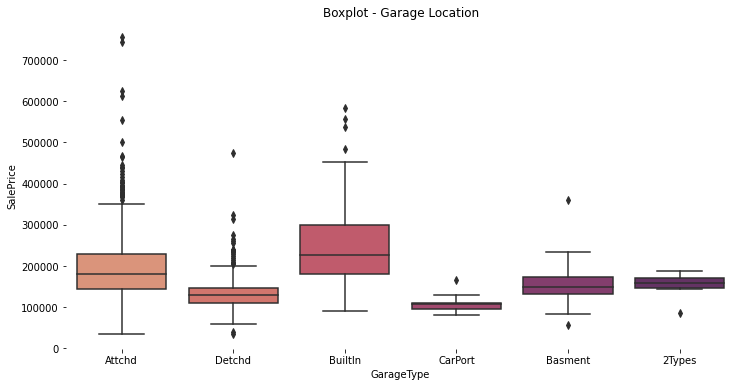

In [28]:
plt.figure(figsize=(12, 6))

sns.boxplot(data = df1[['GarageType', 'SalePrice']],
           x = 'GarageType', y = 'SalePrice', palette = 'flare')

plt.title('Boxplot - Garage Location' )
sns.despine(bottom = True, left = True);

***

**BASEMENT**

6. Houses with unfinished basement cost less

Dict:

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

***

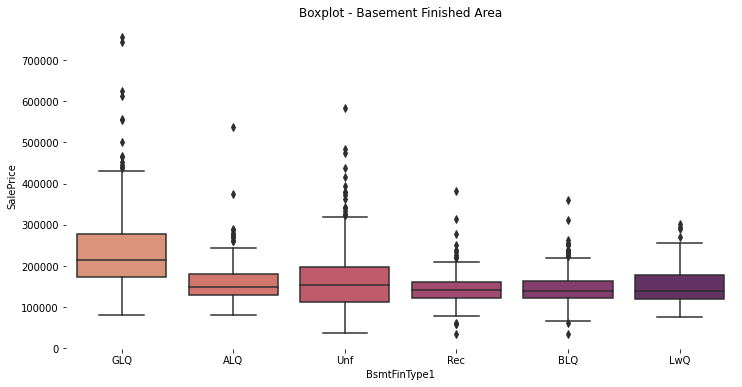

In [29]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(data = df1[['BsmtFinType1', 'SalePrice']],
           x = 'BsmtFinType1', y = 'SalePrice', palette = 'flare')

plt.title('Boxplot - Basement Finished Area' )
sns.despine(bottom = True, left = True);

***

**BASEMENT**

7. Houses with low basement height  have worst quality rating and cost less

Dict:

    - BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
    - BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
***

In [30]:
aux = df1[['BsmtQual', 'BsmtFinType1', 'SalePrice']]

# removing houses with no basement
aux = aux.drop(index = df[df['BsmtQual'] == 'NA'].index)
aux = aux.drop(index = df[df['BsmtFinType1'] == 'NA'].index)

In [31]:
BsmtQual = aux[['BsmtQual', 'SalePrice']].groupby('BsmtQual', as_index = False).mean()
BsmtFinType1 = aux[['BsmtFinType1', 'SalePrice']].groupby('BsmtFinType1', as_index = False).mean()

In [32]:
BsmtQual.sort_values(by = 'SalePrice')

,BsmtQual,SalePrice
1,Fa,115692.028571
3,TA,138866.295918
2,Gd,202688.478964
0,Ex,327041.041322


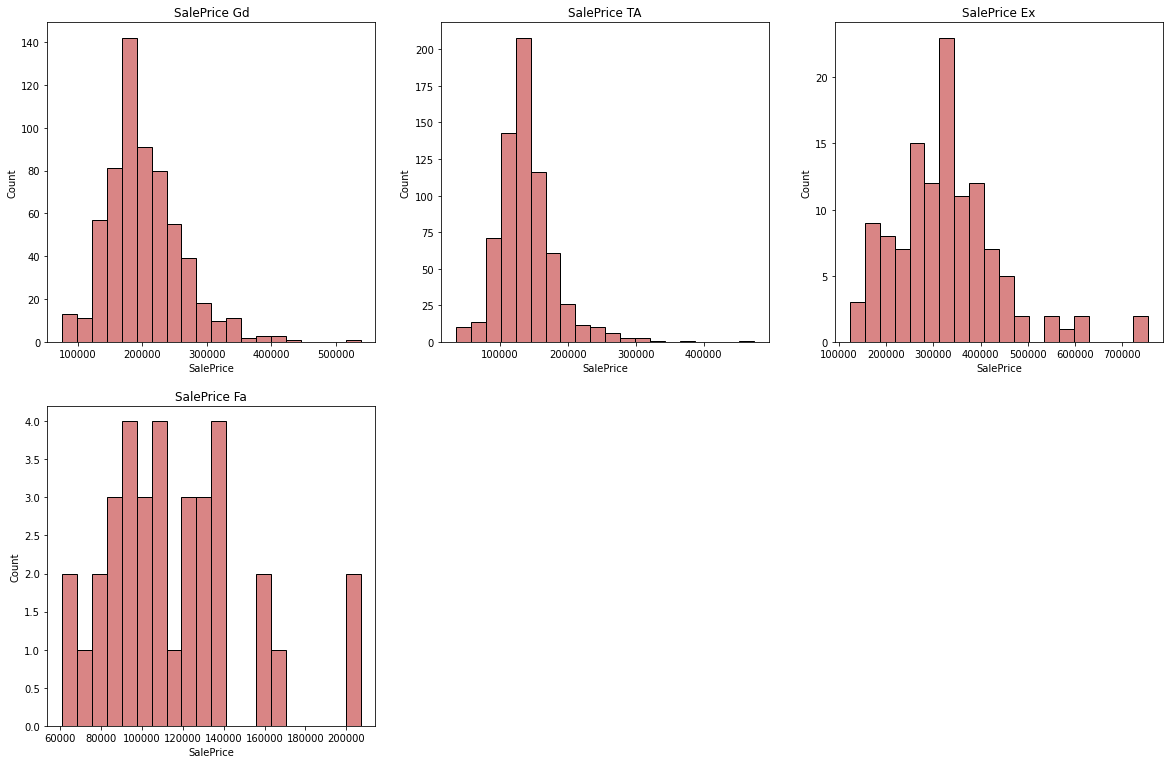

In [33]:
plt.figure(figsize = (20, 20))
x = 1

for d in df1['BsmtQual'].unique():
    plt.subplot(3, 3, x)
    sns.histplot(data = df1[df['BsmtQual'] == d], x = 'SalePrice', bins = 20, color = 'indianred')
    plt.title('SalePrice {}'.format(d))
    x += 1
    
    
 

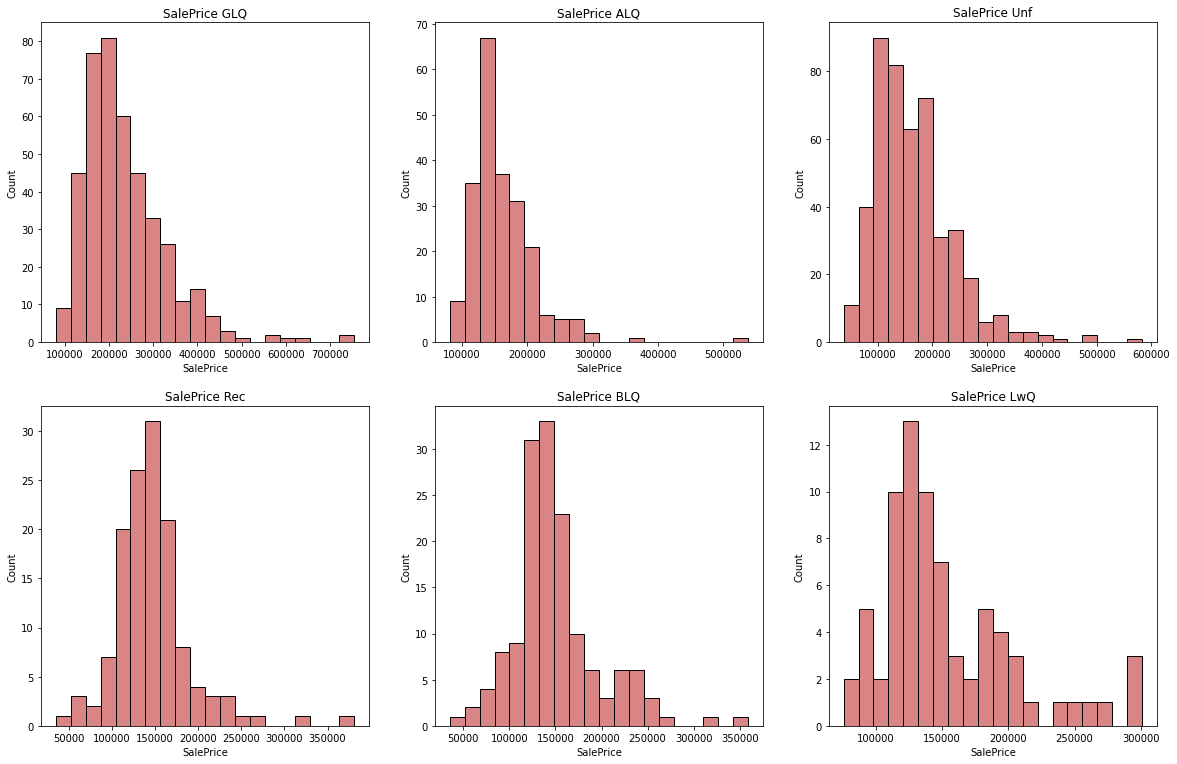

In [34]:
plt.figure(figsize = (20, 20))
x = 1

for d in df1['BsmtFinType1'].unique():
    plt.subplot(3, 3, x)
    sns.histplot(data = df1[df['BsmtFinType1'] == d], x = 'SalePrice', bins = 20, color = 'indianred')
    plt.title('SalePrice {}'.format(d))
    x += 1
    
    
 

In [35]:
BsmtFinType1.sort_values(by = 'BsmtFinType1')

,BsmtFinType1,SalePrice
0,ALQ,161573.068182
1,BLQ,149493.655405
2,GLQ,235413.720096
3,LwQ,151852.702703
4,Rec,146889.248120
5,Unf,165519.282655


***

**KITCHEN**

8. Houses with good quality rating cost more

Dict:

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

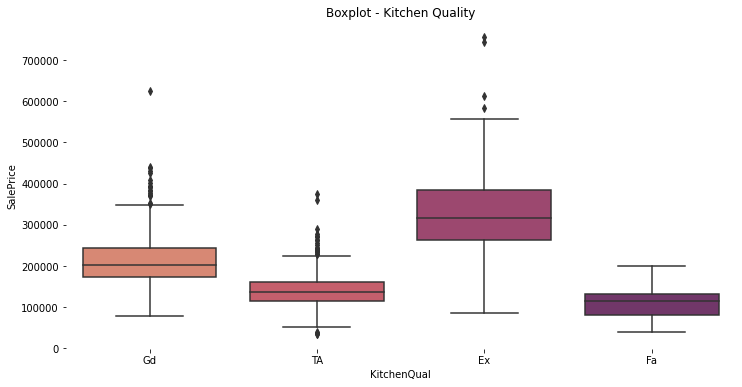

In [36]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df1[['KitchenQual', 'SalePrice']], x = 'KitchenQual', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - Kitchen Quality' )
sns.despine(bottom = True, left = True)

****

**BATH**

Houses with full bath + half bath cost more

Dict:

    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade

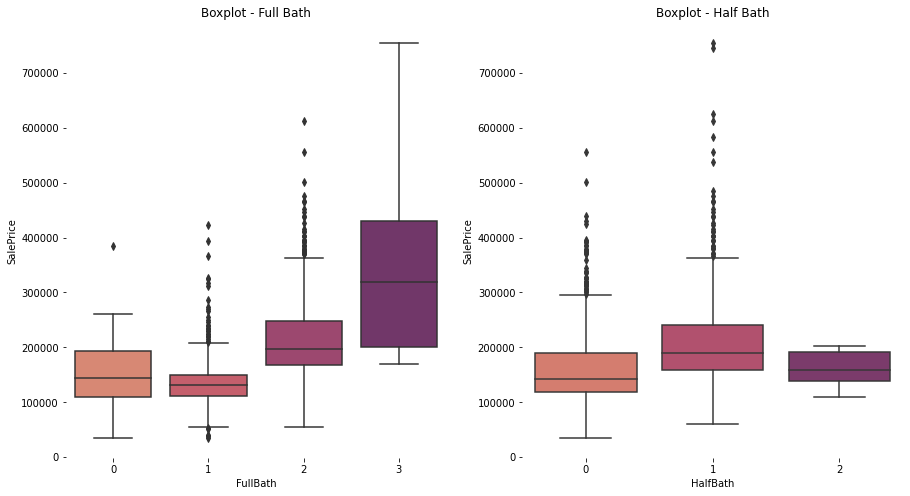

In [37]:
plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data = df1[['FullBath', 'HalfBath', 'SalePrice']], x = 'FullBath', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - Full Bath' )
sns.despine(bottom = True, left = True)

plt.subplot(1, 2, 2)
sns.boxplot(data = df1[['FullBath', 'HalfBath', 'SalePrice']], x = 'HalfBath', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - Half Bath' )
sns.despine(bottom = True, left = True);

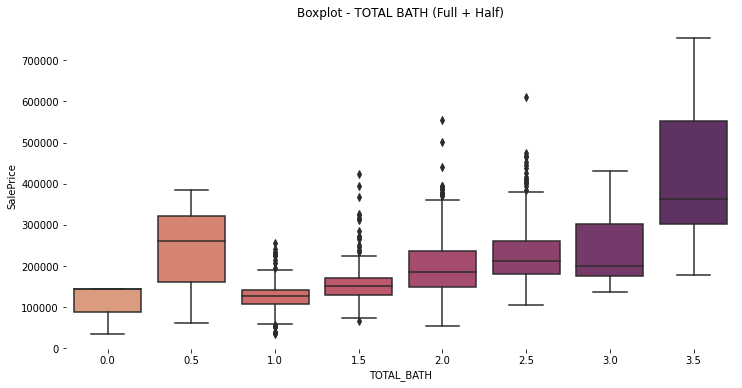

In [38]:
# Fullbath + halfbath (sum both)
df1['HALFBATH'] = df1['HalfBath'].apply(lambda x: (x / 2) if
                     x != 0
                     else 0)

df1['TOTAL_BATH'] = df1['HALFBATH'] + df1['FullBath']

plt.figure(figsize = (12, 6))
sns.boxplot(data = df1[['TOTAL_BATH', 'SalePrice']], x = 'TOTAL_BATH', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - TOTAL BATH (Full + Half)' )
sns.despine(bottom = True, left = True);

In [39]:
df1 = df1.drop(columns = ('HALFBATH'))

**LOT CONFIGURATION AND AREA**

10. Houses with more than one frontage (entry) cost more

Dict:

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property


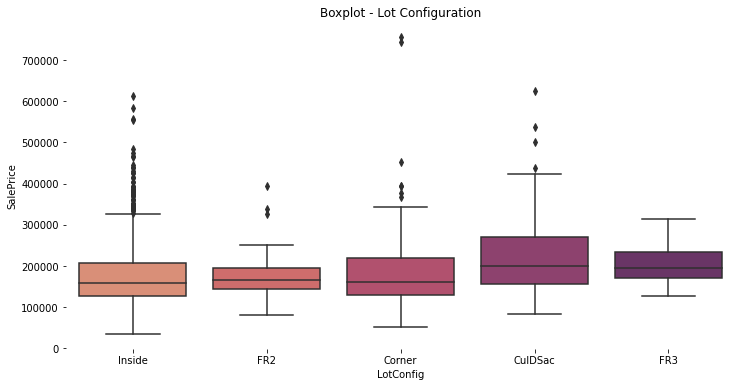

In [40]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df1[['LotConfig', 'SalePrice']], x = 'LotConfig', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - Lot Configuration' )
sns.despine(bottom = True, left = True);

**LOT CONFIGURATION AND AREA**

11. Irregular lots shape cost less

Dict:

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

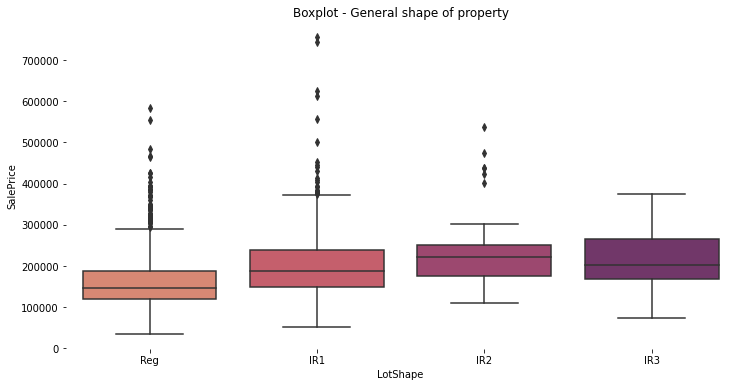

In [41]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df1[['LotShape', 'SalePrice']], x = 'LotShape', y = 'SalePrice', palette = 'flare')
plt.title('Boxplot - General shape of property' )
sns.despine(bottom = True, left = True);

**REMODELED HOUSES**

1. **Remodeled houses cost more**

Remodeled houses dont' cost more.
    
    Mean Price:
    Modeled Houses: 179096.307471

    Not modeled Houses: 182583.659686
    
Variable not so relevant for our model.

**2. Remodeled houses have a better quality condition and then, cost more**

There's a difference, specially for rating 9, but it's not possible to consider as a importante variable.

***

**GARAGE**

**3. Houses with more car capacity cost more**

**4. Houses with no car space cost less**

Sale price increase if there’s more garage space until 3 garages cars. Houses with capacity for 4 cars have it’s sale price lower.

This variable was considered as importante for our ML model.

**5. Houses with more than one type of garage cost more**

There’s big differences among the garage type. Carport garage’s have the lowest price, even considering it’s outlier.

***

**BASEMENT**

**6. Houses with unfinished basement cost less**

This hypothesis is not true. There’s a difference regarding to price sale, especially for basement classified in GLQ (Good living quarters) category. All categories left don’t change too much.

We're going to determine if this variable is importante for our ML model in other analysis later. (Not sure about it’s impact)

**7. Houses with bad basement quality have worst quality rating and cost less**
Houses classified as Excellent and Fair have it’s price more distributed than good and typical. Same for basement type.
 
We're going to determine if this variable is importante for our ML model in other analysis later. (Not sure about it’s impact)

***

**KITCHEN**

8. Houses with good quality rating cost more

Kitchen classified in “Excellent” category have it’s price higher while kitchen with “Fair” category have it’s price lower.

***

**BATH**

9. Houses with full bath + half bath cost more

Full bath have more impact to house price than Half bath. Considering both (half + full bath), we can see a huge price difference.
This variable is importante for our ML model.
***

**LOT CONFIGURATION AND AREA**

10. Houses with more than one frontage (entry) cost more

11. Irregular lots shape cost less

There’s not big price difference among log configuration categories.
This variable is not importante for our ML model.

Lot shape, despite it’s small difference, won’t be considered as importante for our machine learning model.


***

Note: The importance of these variable will be a analyzed again later on is this notebook.

## Univariate and Multivariate Analysis

In [42]:
df2 = df1.copy()

# numerical attributes
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64'])

### Numerical Variables

In [43]:
# cols which were analyzed in previous section
#'REMODEL', 'HalfBath', 'FullBath', 'MoSold', 'YrSold', 'Id', 'YearRemodAdd', 'LotArea', 'LotFrontage'
aux = num_attributes.drop(columns=['REMODEL', 'HalfBath', 'FullBath', 'MoSold', 'YrSold', 
                                   'YearRemodAdd', 'LotArea', 'LotFrontage',
                                  'YearBuilt', 'GarageYrBlt'])

<AxesSubplot:>

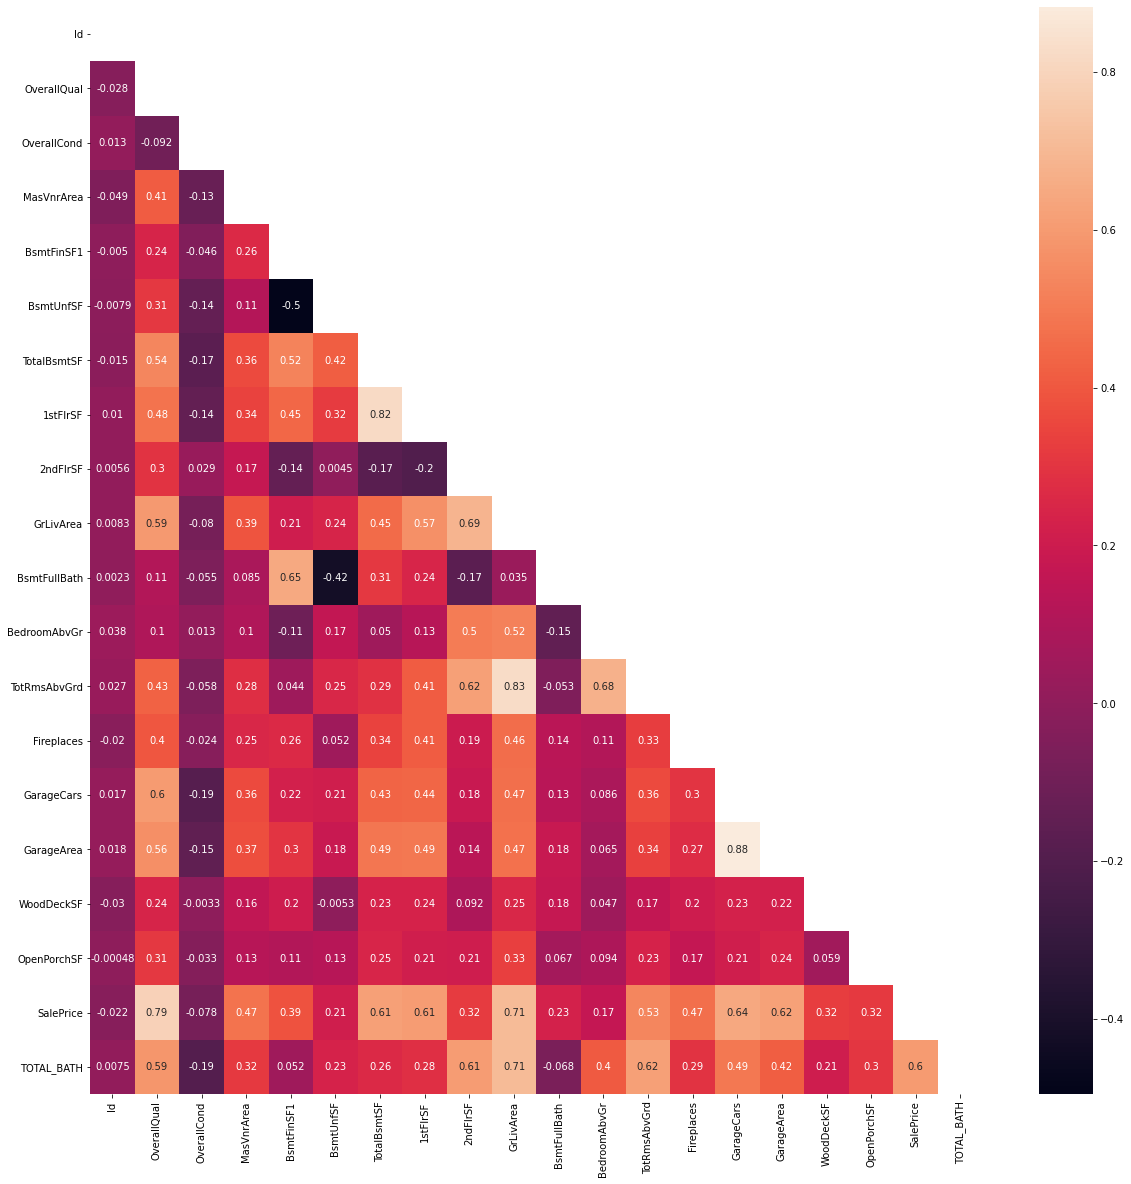

In [44]:
plt.figure(figsize=(20, 20))

corr = aux.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask = mask,annot = True)


**Strong corr**
 
 - GarageArea x GarageCars
 - 1stFlrSF x TotalBsmtSF
 - TotRmsAbvGrd x BedroomAbvGr

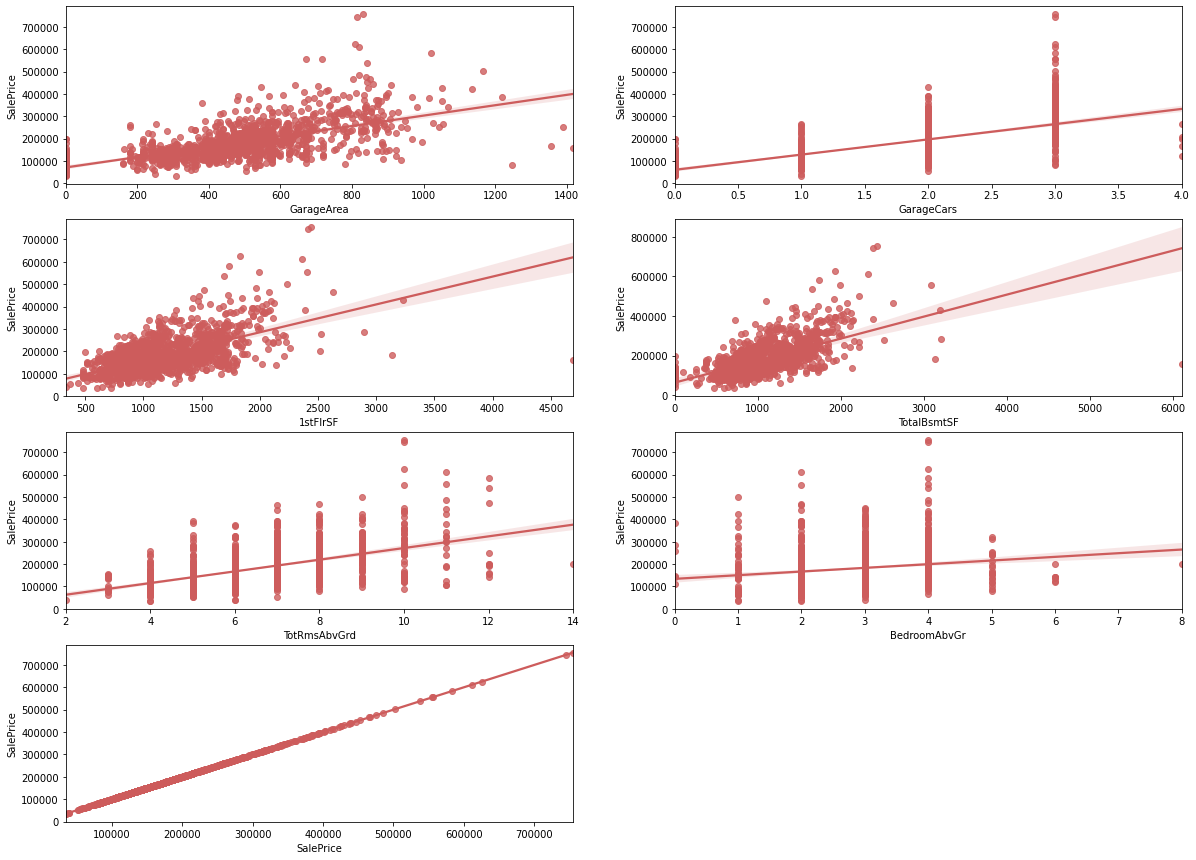

In [45]:
cols = ['GarageArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF',  'TotRmsAbvGrd', 'BedroomAbvGr', 'SalePrice']

plt.figure(figsize=(20, 15))
x = 1
for f in cols:
    plt.subplot(4, 2, x)
    sns.regplot(data = num_attributes[cols], x = f, y = 'SalePrice', color = 'indianred')
    x += 1

In [46]:
# drop cols - correlated / same behavior and 
num_attributes = num_attributes.drop(columns=(['GarageCars', 'TotalBsmtSF', 'BedroomAbvGr', 'MoSold', 'YrSold',
                                              'FullBath', 'HalfBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']))

### Categorical Variables

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

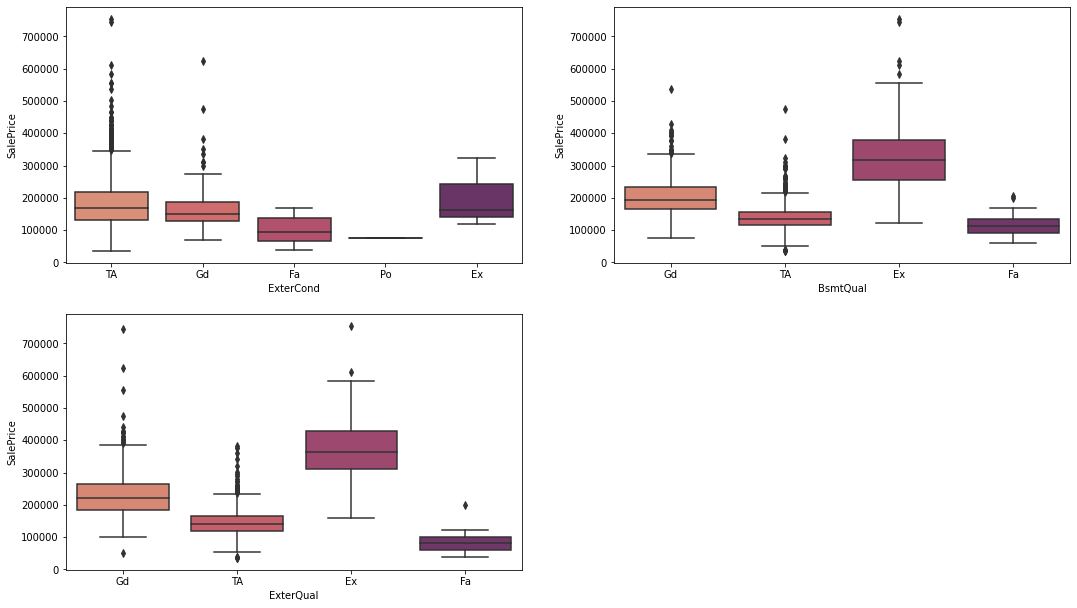

In [47]:
plt.figure(figsize=(18, 16))

plt.subplot(3, 2, 1)
sns.boxplot(data = df2, x = 'ExterCond', y = 'SalePrice', palette = 'flare')

plt.subplot(3, 2, 2)
sns.boxplot(data = df2, x = 'BsmtQual', y = 'SalePrice', palette = 'flare')

plt.subplot(3, 2, 3)
sns.boxplot(data = df2, x = 'ExterQual', y = 'SalePrice', palette = 'flare')


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

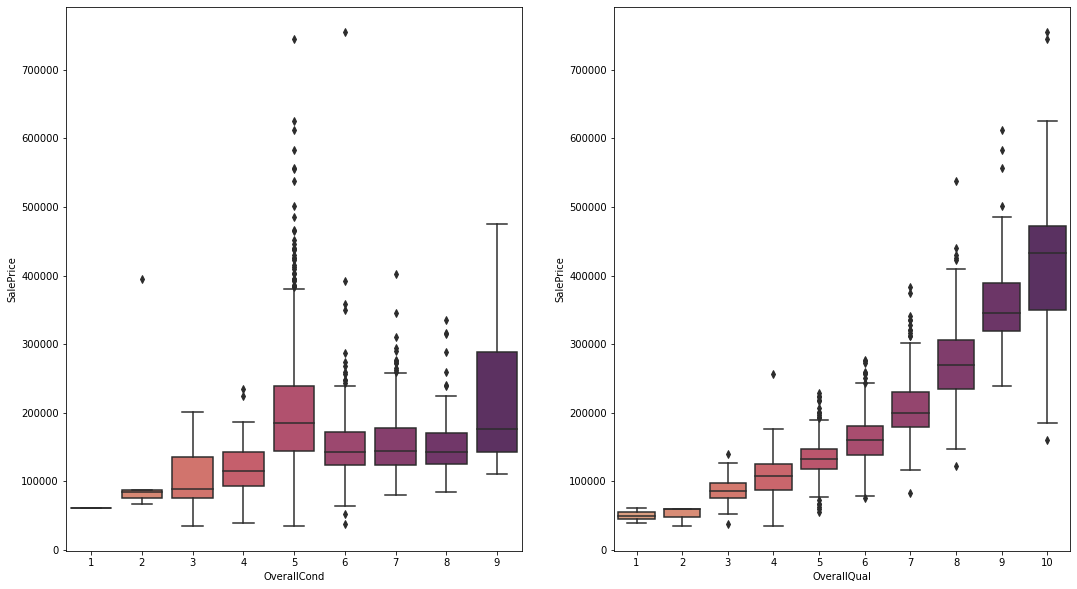

In [48]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data = df2, x = 'OverallCond',  y = 'SalePrice', palette = 'flare')

plt.subplot(1, 2, 2)
sns.boxplot(data = df2, x = 'OverallQual', y = 'SalePrice', palette = 'flare')

In [49]:
# bsmtQual and ExterQual have similar behavior
# MSZoning is very concentrate in a unique category
# LotConfig and LotShape- we've considered as not importante variable

cat_attributes = cat_attributes.drop(columns=(['BsmtQual', 'MSZoning', 'LotConfig', 'LotShape']))

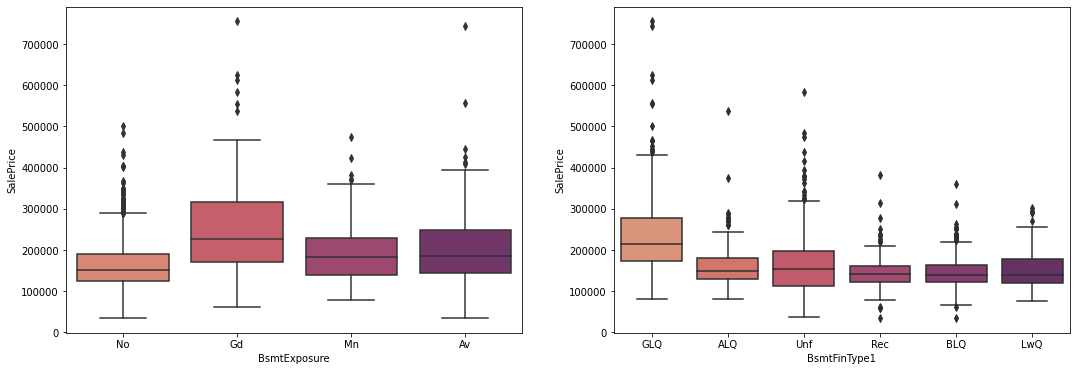

In [50]:
#basement features - in previous analysis, we've notice that basement features, in general,
#don't have big influence in SalePrice

#let's take a better look - 2 basement variables left

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data = df2[['BsmtExposure', 'SalePrice']], x = 'BsmtExposure', palette = 'flare',
           y = 'SalePrice')

plt.subplot(1, 2, 2)
sns.boxplot(data = df2[['BsmtFinType1', 'SalePrice']], x = 'BsmtFinType1',palette = 'flare', 
           y = 'SalePrice');


#df2[['BsmtExposure', 'BsmtFinType1', 'SalePrice']]

In [51]:
cat_attributes = cat_attributes.drop(columns=(['BsmtExposure', 'BsmtFinType1']))

''

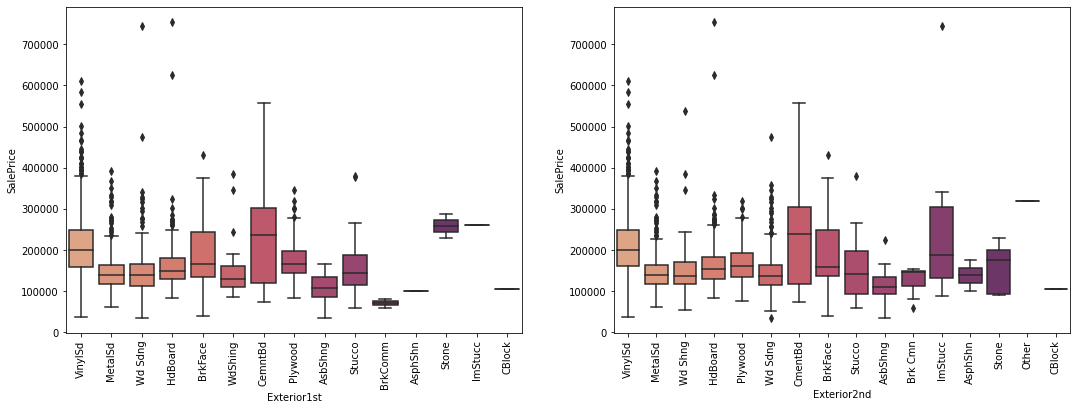

In [52]:
# Exterior1st: Exterior covering on house
# Exterior2nd covering on house (if more than one material)


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data = df2[['Exterior1st', 'SalePrice']], x = 'Exterior1st', palette = 'flare',
           y = 'SalePrice')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.boxplot(data = df2[['Exterior2nd', 'SalePrice']], x = 'Exterior2nd',palette = 'flare', 
           y = 'SalePrice')
plt.xticks(rotation = 90)
;


In [53]:
cat_attributes = cat_attributes.drop(columns=['Exterior2nd']) 

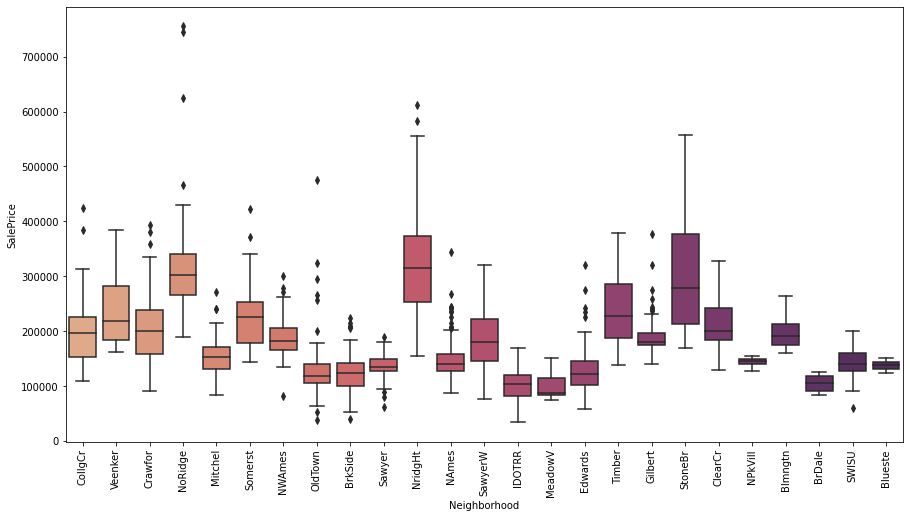

In [54]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = df2[['Neighborhood', 'SalePrice']], x = 'Neighborhood', palette = 'flare',
           y = 'SalePrice')
plt.xticks(rotation = 90);


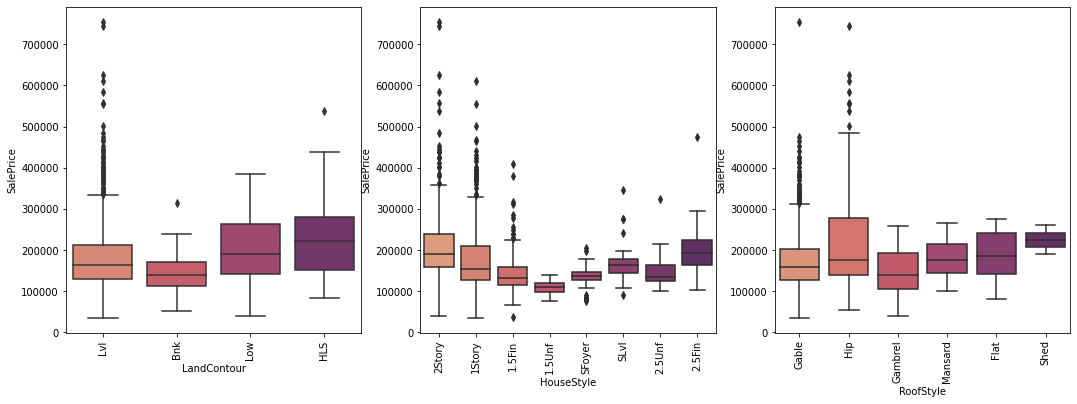

In [55]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data = df2[['LandContour', 'SalePrice']], x = 'LandContour', palette = 'flare',
           y = 'SalePrice')
plt.xticks(rotation = 90)

plt.subplot(1, 3, 2)
sns.boxplot(data = df2[['HouseStyle', 'SalePrice']], x = 'HouseStyle', palette = 'flare',
           y = 'SalePrice')
plt.xticks(rotation = 90)


plt.subplot(1, 3, 3)
sns.boxplot(data = df2[['RoofStyle', 'SalePrice']], x = 'RoofStyle', palette = 'flare',
           y = 'SalePrice')
plt.xticks(rotation = 90);


In [56]:
cat_attributes = cat_attributes.drop(columns = (['LandContour', 'RoofStyle']))

In [57]:
cat_attributes = cat_attributes.merge(df2['SalePrice'], right_index = True, left_index = True)
cat_attributes

,Neighborhood,HouseStyle,Exterior1st,MasVnrType,ExterQual,ExterCond,Foundation,HeatingQC,KitchenQual,GarageType,GarageFinish,SalePrice
0,CollgCr,2Story,VinylSd,BrkFace,Gd,TA,PConc,Ex,Gd,Attchd,RFn,208500
1,Veenker,1Story,MetalSd,None,TA,TA,CBlock,Ex,TA,Attchd,RFn,181500
2,CollgCr,2Story,VinylSd,BrkFace,Gd,TA,PConc,Ex,Gd,Attchd,RFn,223500
3,Crawfor,2Story,Wd Sdng,None,TA,TA,BrkTil,Gd,Gd,Detchd,Unf,140000
4,NoRidge,2Story,VinylSd,BrkFace,Gd,TA,PConc,Ex,Gd,Attchd,RFn,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,2Story,VinylSd,None,TA,TA,PConc,Ex,TA,Attchd,RFn,175000
1456,NWAmes,1Story,Plywood,Stone,TA,TA,CBlock,TA,TA,Attchd,Unf,210000
1457,Crawfor,2Story,CemntBd,None,Ex,Gd,Stone,Ex,Gd,Attchd,RFn,266500
1458,NAmes,1Story,MetalSd,None,TA,TA,CBlock,Gd,Gd,Attchd,Unf,142125


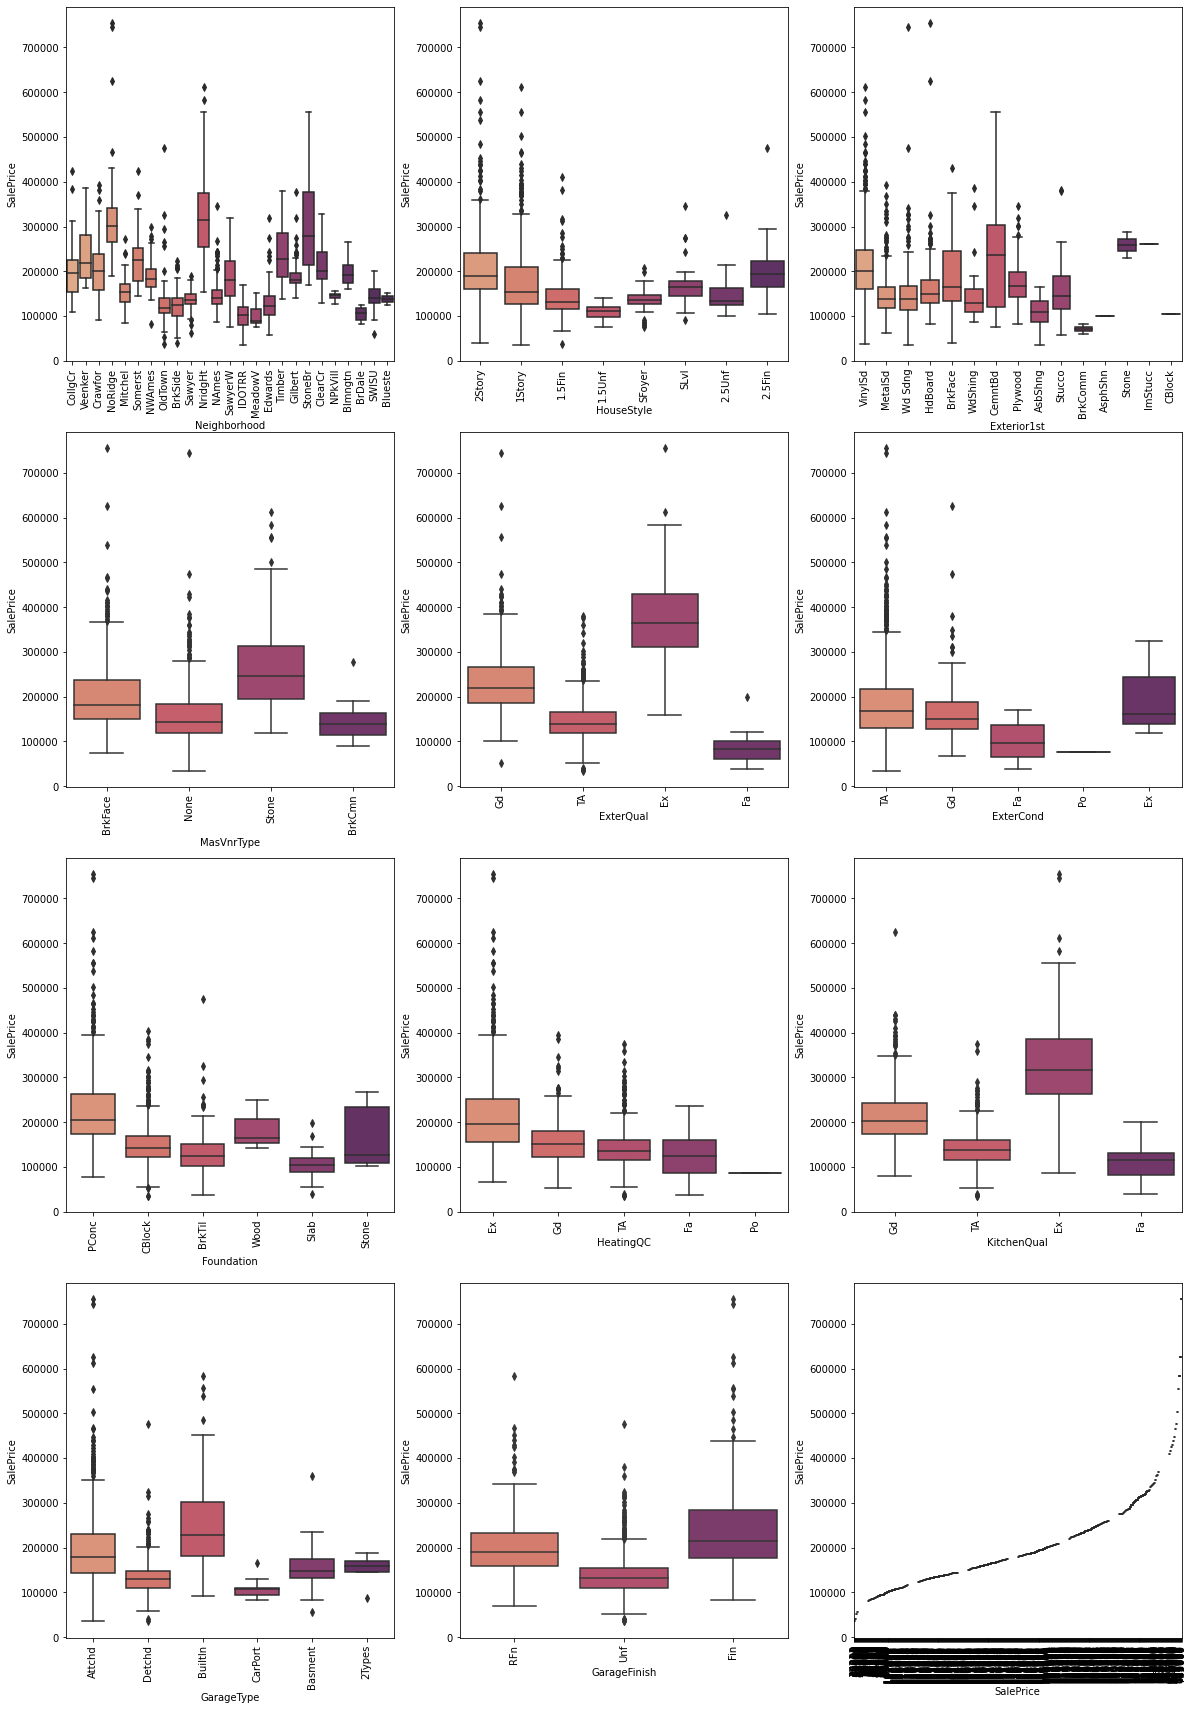

In [58]:
plt.figure(figsize = (20,30 ))
x = 1

for d in cat_attributes:
    plt.subplot(4, 3, x)
    sns.boxplot(data = cat_attributes, x = d, y = 'SalePrice', palette = 'flare')
    plt.xticks(rotation = 90)
    x += 1

In [59]:
#kitchenQual, MasVnType and ExternalQuality has similar behavior
cat_attributes = cat_attributes .drop(columns=['MasVnrType', 'ExterQual', 'SalePrice'])

### Final Analysis

In [60]:
num_attributes.head(3)



,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,REMODEL,TOTAL_BATH
0,1,65.0,8450,7,5,196.0,706,150,856,854,1710,1,8,0,548,0,61,208500,0,2.5
1,2,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,6,1,460,298,0,181500,0,2.0
2,3,68.0,11250,7,5,162.0,486,434,920,866,1786,1,6,1,608,0,42,223500,1,2.5


In [61]:
cat_attributes.head(3)

,Neighborhood,HouseStyle,Exterior1st,ExterCond,Foundation,HeatingQC,KitchenQual,GarageType,GarageFinish
0,CollgCr,2Story,VinylSd,TA,PConc,Ex,Gd,Attchd,RFn
1,Veenker,1Story,MetalSd,TA,CBlock,Ex,TA,Attchd,RFn
2,CollgCr,2Story,VinylSd,TA,PConc,Ex,Gd,Attchd,RFn


In [62]:
df2 = cat_attributes.merge(num_attributes, right_index = True, left_index = True)


# DATA PREPARATION 

### Numerical Features

In [63]:
df3 = df2.copy()

In [64]:
df3.head()

,Neighborhood,HouseStyle,Exterior1st,ExterCond,Foundation,HeatingQC,KitchenQual,GarageType,GarageFinish,Id,...,GrLivArea,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,REMODEL,TOTAL_BATH
0,CollgCr,2Story,VinylSd,TA,PConc,Ex,Gd,Attchd,RFn,1,...,1710,1,8,0,548,0,61,208500,0,2.5
1,Veenker,1Story,MetalSd,TA,CBlock,Ex,TA,Attchd,RFn,2,...,1262,0,6,1,460,298,0,181500,0,2.0
2,CollgCr,2Story,VinylSd,TA,PConc,Ex,Gd,Attchd,RFn,3,...,1786,1,6,1,608,0,42,223500,1,2.5
3,Crawfor,2Story,Wd Sdng,TA,BrkTil,Gd,Gd,Detchd,Unf,4,...,1717,1,7,1,642,0,35,140000,1,1.0
4,NoRidge,2Story,VinylSd,TA,PConc,Ex,Gd,Attchd,RFn,5,...,2198,1,9,1,836,192,84,250000,0,2.5


In [65]:
# numerical attributes
num_attributes = df3.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df3.select_dtypes(exclude=['int64', 'float64'])

### NORMALIZATION

In [66]:
# min max scaler for variables with few outliers
# robust scaler for variables with many outliers

aux = df3[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
'1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'GarageArea', 'SalePrice']]     

aux.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,68.267123,10516.828082,103.492466,443.639726,567.240411,1162.626712,346.992466,1515.463699,94.244521,46.660274,472.980137,180921.195890
std,22.356355,9981.264932,180.795612,456.098091,441.866955,386.587738,436.528436,525.480383,125.338794,66.256028,213.804841,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,223.000000,882.000000,0.000000,1129.500000,0.000000,0.000000,334.500000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,477.500000,1087.000000,0.000000,1464.000000,0.000000,25.000000,480.000000,163000.000000
75%,79.000000,11601.500000,165.250000,712.250000,808.000000,1391.250000,728.000000,1776.750000,168.000000,68.000000,576.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,2336.000000,4692.000000,2065.000000,5642.000000,857.000000,547.000000,1418.000000,755000.000000


In [67]:
#min max scaler
mms = MinMaxScaler()

df3['LotFrontage'] = mms.fit_transform(df3[['LotFrontage']].values)
df3['LotArea'] = mms.fit_transform(df3[['LotArea']].values)
df3['BsmtFinSF1'] = mms.fit_transform(df3[['BsmtFinSF1']].values)
df3['MasVnrArea'] = mms.fit_transform(df3[['MasVnrArea']].values)
df3['BsmtUnfSF'] = mms.fit_transform(df3[['BsmtUnfSF']].values)
df3['1stFlrSF'] = mms.fit_transform(df3[['1stFlrSF']].values)
df3['GrLivArea'] = mms.fit_transform(df3[['GrLivArea']].values)

# Robust Scaler
rs = RobustScaler()

df3['2ndFlrSF'] = rs.fit_transform(df3[['2ndFlrSF']].values)
df3['2ndFlrSF'] = rs.fit_transform(df3[['2ndFlrSF']].values)
df3['WoodDeckSF'] = rs.fit_transform(df3[['WoodDeckSF']].values)
df3['OpenPorchSF'] = rs.fit_transform(df3[['OpenPorchSF']].values)
df3['GarageArea'] = rs.fit_transform(df3[['GarageArea']].values)

In [69]:
df3[aux.columns].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.161874,0.043080,0.064683,0.078604,0.242826,0.190139,0.476638,0.222582,0.560979,0.318533,-0.029068,180921.195890
std,0.076563,0.046653,0.112997,0.080811,0.189155,0.088708,0.599627,0.098998,0.746064,0.974353,0.885320,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.367647,-1.987578,34900.000000
25%,0.133562,0.029229,0.000000,0.000000,0.095462,0.125746,0.000000,0.149868,0.000000,-0.367647,-0.602484,129975.000000
50%,0.143836,0.038227,0.000000,0.067948,0.204409,0.172786,0.000000,0.212886,0.000000,0.000000,0.000000,163000.000000
75%,0.198630,0.048150,0.103281,0.126196,0.345890,0.242600,1.000000,0.271807,1.000000,0.632353,0.397516,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.836538,1.000000,5.101190,7.676471,3.884058,755000.000000


### Categorical Features

In [92]:
cat_attributes.columns

Index(['Neighborhood', 'HouseStyle', 'Exterior1st', 'ExterCond', 'Foundation',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish'],
      dtype='object')

In [91]:
for f in cat_attributes.columns:
    print(cat_attributes[f].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype

In [ ]:
#Label Encoder
le = LabelEncoder()
df3['HouseStyle'] = le.fit_transform(df3['HouseStyle'])
df3['Foundation'] = le.fit_transform(df3['Foundation'])
df3['Neighborhood'] = le.fit_transform(df3['Neighborhood'])
df3['GarageType'] = le.fit_transform(df3['GarageType'])
df3['Exterior1st'] = le.fit_transform(df3['Exterior1st'])

#'HeatingQC' --- Ordinal encoding
#'ExterCond' --- Ordinal encoding
#'KitchenQual' --- Ordinal encoding 
HeatingQC_dict = ({'Ex' : 5, 
                  'Gd' : 4, 
                  'TA' : 3, 
                  'Fa' : 2, 
                  'Po' : 1, })

ExterCond_dict = ({'Ex' : 5, 
                  'Gd' : 4, 
                  'TA' : 3, 
                  'Fa' : 2, 
                  'Po' : 1, })

KitchenQual_dict = ({'Ex' : 4, 
                  'Gd' : 3, 
                  'TA' : 2, 
                  'Fa' : 1})

df3['HeatingQC'] = df3['HeatingQC'].map(HeatingQC_dict)
df3['ExterCond'] = df3['ExterCond'].map(ExterCond_dict)
df3['KitchenQual'] = df3['KitchenQual'].map(KitchenQual_dict)
 
#'GarageFinish' --- One Hot encoding
df3 = pd.get_dummies(df3, prefix = ['GarageFinish'], columns = ['GarageFinish'])

# FEATURE SELECTION

# MACHINE LEARNING

## Average Model

## Linear Regression Model

### Linear Regression Model - Cross Validation

## Linear Regression Regularized Model - Lasso

### LASSO - Cross Validation

## Random Forest Regressor 

### Random Forest Regressor - Cross Validation 

## XGBoost Regressor

### XGBoost Regressor - Cross Validation

## Compare Model's Performance

### Single Performance

### Real Performance - Cross Validation

### CROSS-VALIDATION

# HYPERPARAMETER FINE TUNING

### Random Search

# FINAL MODEL AND PERFORMANCE

### Total Performance